In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [17]:
X = iris.data
y = iris.target

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Плохой способ проверки модели

In [20]:
# Рассмотрим наивный метод проверки модели. Будем использовать в этом примере классификатор на основе
# метода k-средних c n_neighbors=1. Это простая модель, по сути метка для неизвестной точки такая же как
# и метка ближайшей к ней обучающей точке

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)

In [22]:
# Обучим модель и используем ее для предсказания уже известных меток 

model.fit(X, y)
y_model = model.predict(X)

In [23]:
# Вычисли долю правильно маркированных точек

from sklearn.metrics import accuracy_score

accuracy_score(y, y_model)

1.0

In [25]:
# Точность 100%, поскольку обучение  оценка модели проходили на одних и тех же данных. ЭТО НЕПРАВИЛЬНЫЙ ПОДХОД!

# Хороший способ проверки: cross-validation

In [27]:
# Потеря части наших данных для обучения модели это недостаток отложенных
# данных для проверки модели. Это неоптимально и может стать проблемой, ососбенно, если набор данных невелик.

# Решением проблемы является применение cross-validation (то есть перекрестной проверки), то есть
# выполнение последовательности апроксимаций, в которой каждое модмножество данных используется как
# в обучающей выборке так и в качестве проверочного набора

from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y, train_size=0.5) # разделили данные по 50% в каждом наборе

In [28]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)

accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.9466666666666667, 0.96)

In [29]:
# Сейчас я использовал конкретный вид перекрестной проверки, в которой данные были разбиты на 2 набора 
# и по очереди применяли каждый из них в качестве проверочного набора. Это называется двухблочной перекрестной
# проверкой.

In [30]:
# Можно распространить эту идею на случай большего числа попыток и больше количества блоков данных

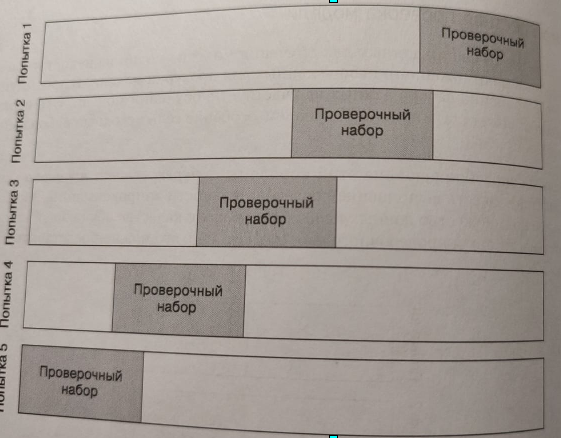

In [31]:
# В этом случае мы разбиваем данные на 5 групп и по очереди исполььзуем каждую из них
# для оценки обучения модели на остальных 4\5 данных.

from sklearn.model_selection import cross_val_score

cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [32]:
# Получили 5 результатов. Повторение проверки по различным подмножествам данных дает нам лучшее представление
# о качестве работы алгооритма.